In [1]:
%load_ext autoreload

In [2]:
def parcial_2(x_vals: list, y_vals: list) -> tuple[float, float, float]:
    c2 = sum(xi ** 4 for xi in x_vals)
    c1 = sum(xi ** 3 for xi in x_vals)
    c0 = sum(xi ** 2 for xi in x_vals)
    c_ind = sum(xi ** 2 * yi for xi, yi in zip(x_vals, y_vals))
    return (c2, c1, c0, c_ind)

def parcial_1(x_vals: list, y_vals: list) -> tuple[float, float, float]:
    c2 = sum(xi ** 3 for xi in x_vals)
    c1 = sum(xi ** 2 for xi in x_vals)
    c0 = sum(xi for xi in x_vals)
    c_ind = sum(xi * yi for xi, yi in zip(x_vals, y_vals))
    return (c2, c1, c0, c_ind)

def parcial_0(x_vals: list, y_vals: list) -> tuple[float, float, float]:
    c2 = sum(xi ** 2 for xi in x_vals)
    c1 = sum(xi for xi in x_vals)
    c0 = len(x_vals)
    c_ind = sum(yi for yi in y_vals)
    return (c2, c1, c0, c_ind)


In [5]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

In [8]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs1, ys1, gradiente=[parcial_0, parcial_1, parcial_2])

[01-11 14:50:02][INFO] Se ajustarán 3 parámetros.
[01-11 14:50:02][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-11 14:50:02][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]


[01-11 14:50:26][INFO] Se ajustarán 3 parámetros.
[01-11 14:50:26][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-11 14:50:26][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
a2: 2.024410482925083
a1: -1.1233251295755429
a0: -0.6382556172537739


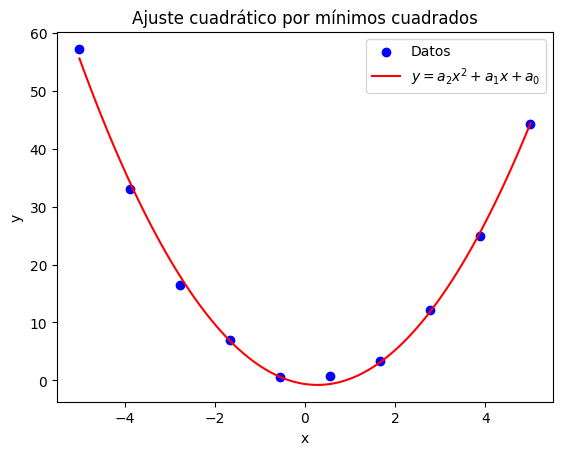

In [10]:
import numpy as np
import matplotlib.pyplot as plt

a2, a1, a0 = ajustar_min_cuadrados(xs1, ys1, gradiente=[parcial_0, parcial_1, parcial_2])

x_points = np.linspace(min(xs1), max(xs1), 100)

y_points = [a2 * xi**2 + a1 * xi + a0 for xi in x_points]

print(f"a2: {a2}")
print(f"a1: {a1}")
print(f"a0: {a0}")

plt.scatter(xs1, ys1, label="Datos", color="blue")
plt.plot(x_points, y_points, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cuadrático por mínimos cuadrados")
plt.legend()
plt.show()

In [11]:
import math

def parcial_b(x_vals: list, y_vals: list) -> tuple[float, float, float]:
    ln_y_vals = [math.log(y) for y in y_vals]
    c1 = sum(x * ln_y for x, ln_y in zip(x_vals, ln_y_vals))
    c0 = sum(x ** 2 for x in x_vals)
    c_ind = sum(x_vals)
    return (c0, c_ind, c1)

def parcial_ln_a(x_vals: list, y_vals: list) -> tuple[float, float, float]:
    ln_y_vals = [math.log(y) for y in y_vals]
    c1 = sum(ln_y_vals)
    c0 = sum(x_vals)
    c_ind = len(x_vals)
    return (c0, c_ind, c1)

In [20]:
xs2 = np.array([
        0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 0.9070,
        1.0367, 1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 2.0114, 2.0557,
        2.1610, 2.6344
    ])
ys2 = np.array([
        1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 1.2887,
        3.1239, 2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 10.5890, 11.5865,
        11.8221, 26.5077
    ])


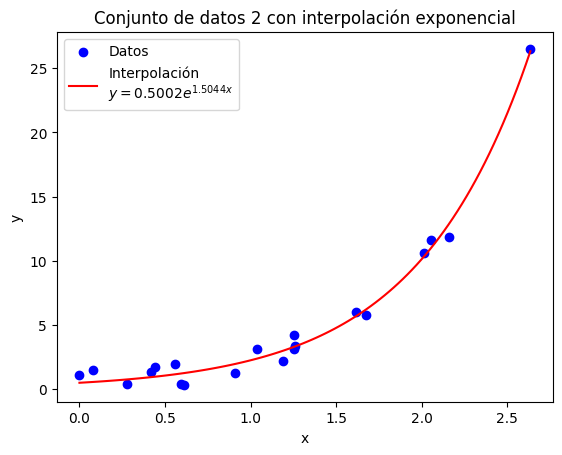

Coeficientes ajustados: a = 0.500247, b = 1.504391


In [23]:
def exponencial(x, a, b):
    return a * np.exp(b * x)

params, _ = curve_fit(exponencial, xs2, ys2)
a, b = params

x_points = np.linspace(min(xs2), max(xs2), 100)
y_points = exponencial(x_points, a, b)

plt.scatter(xs2, ys2, label="Datos", color="blue")
plt.plot(x_points, y_points, label=f"Interpolación\n$y = {a:.4f} e^{{{b:.4f}x}}$", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2 con interpolación exponencial")
plt.legend()
plt.show()

print(f"Coeficientes ajustados: a = {a:.6f}, b = {b:.6f}")
